In [1]:
%matplotlib inline

In [2]:
from knesset_social_dynamics.parsers import commitees, graphs
import pathlib
import matplotlib.pyplot as plt
import random
import networkx as nx
import pandas as pd

# Extract full names of knesset members

In [3]:
km_df = pd.read_csv('data/knesset_members_metadata.csv')

In [4]:
km_full_names = []
for first, last in zip(km_df['FirstName'].values, km_df['LastName']):
    km_full_names.append(" ".join([first, last]))

In [5]:
km_df['FullName'] = km_df.apply(lambda x: " ".join([x.FirstName, x.LastName]),axis=1)
km_df.set_index('FullName', inplace=True)

# Load all of חוץ ובטחון

In [6]:
committees_protocols_folder =  pathlib.Path('data/ועדות לפי נושאים/ועדת החוץ והביטחון')

In [7]:
transcripts = []
for prot in committees_protocols_folder.glob('*'):
    transcripts.append(commitees.extract_committee_new_transcript(prot))

2020-07-29 11:31:27.175 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:31:27.207 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:31:27.230 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:31:27.482 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:31:27.677 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:31:27.692 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:31:27.810 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

In [8]:
transcripts_df = pd.concat(transcripts, ignore_index=True)

In [9]:
transcripts_df

,interaction,speaker_name,speaker_party,subject,text
0,<< יור >>,צבי האוזר,"יו""ר",,שלום לכולם. אני מבקש לפתוח את הישיבה. אנחנו בד...
1,<< יור >>,צבי האוזר,"יו""ר",,רז נזרי נמצא אתנו? עדיין לא. כי אני מבין שמתקי...
2,<< דובר >>,איילת לוי נחום,איילת לוי נחום,,\tביום 26.5.2020 החליטה הממשלה לאשר את בקשת וע...
3,<< דובר >>,איילת לוי נחום,איילת לוי נחום,,\tהממשלה דנה היום בהצעת החוק והחליטה לקיים עלי...
4,<< דובר >>,איילת לוי נחום,איילת לוי נחום,,\tבנסיבות העניין מבקשת הממשלה להאריך ב-48 שעות...
...,...,...,...,...,...
6584,<< יור >>,צבי האוזר,"יו""ר",הצעת חוק הסמכת שירות הביטחון הכללי לסייע במאמ...,14:45 חברים. תוציאי הודעה – 14:45.
6585,<< יור >>,צבי האוזר,"יו""ר",הצעת חוק הסמכת שירות הביטחון הכללי לסייע במאמ...,אני רוצה לפתוח את הישיבה. אני מבקש להעמיד להצב...
6586,<< יור >>,צבי האוזר,"יו""ר",הצעת חוק הסמכת שירות הביטחון הכללי לסייע במאמ...,הצבעה
6587,<< יור >>,צבי האוזר,"יו""ר",הצעת חוק הסמכת שירות הביטחון הכללי לסייע במאמ...,ההסתייגות נדחתה.


# Build interrupt network

In [10]:
inter_graph = graphs.extract_transcript_graph(transcripts_df, g_type='committee_breaking')

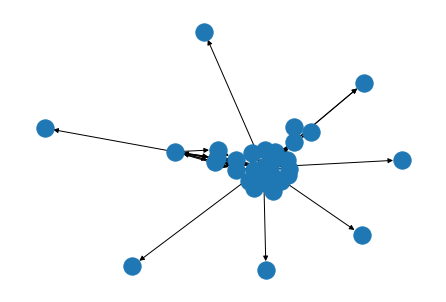

In [11]:
nx.draw(inter_graph)

# Remove non knesset members 

In [12]:
nodes = dict(inter_graph.nodes())
for node in nodes:
    if (str(node)) not in km_full_names:
        inter_graph.remove_node(node)

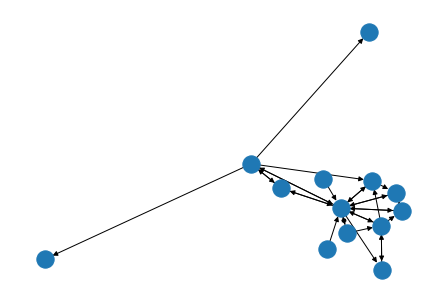

In [13]:
nx.draw(inter_graph)

In [14]:
graphs.extract_adjacency_matrix(inter_graph, 'data/adjacency_matrixes/hutz_bitahon_adj.csv')

In [15]:
graphs.extract_features_matrix(inter_graph, 'data/feature_matrixes/hutz_bitahon_feat.csv')

# Load all of ועדת הכספים

In [16]:
committees_protocols_folder =  pathlib.Path('data/ועדות לפי נושאים/ועדת הכספים')

In [17]:
transcripts = []
for prot in committees_protocols_folder.glob('*'):
    transcripts.append(commitees.extract_committee_new_transcript(prot))

2020-07-29 11:32:10.360 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:10.371 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:10.427 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:10.475 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:10.546 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:10.574 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:10.620 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

In [18]:
transcripts_df = pd.concat(transcripts, ignore_index=True)

In [19]:
transcripts_df

,interaction,speaker_name,speaker_party,subject,text
0,<< יור >>,משה גפני,"יו""ר","הצעת תקנות מס ערך מוסף (הוראת שעה), התש""ף-202...","אני פותח את הישיבה. בבקשה, גיא."
1,<< דובר >>,גיא גולדמן,גיא גולדמן,"הצעת תקנות מס ערך מוסף (הוראת שעה), התש""ף-202...","מענקים נחשבים כחלק ממחיר עסקאותיו של עוסק, ולכ..."
2,<< יור >>,משה גפני,"יו""ר","הצעת תקנות מס ערך מוסף (הוראת שעה), התש""ף-202...",שאלות?
3,<< דובר >>,מיקי לוי,"יש עתיד-תל""ם","הצעת תקנות מס ערך מוסף (הוראת שעה), התש""ף-202...",זה טוב. סוף-סוף הביאו משהו טוב.
4,<< יור >>,משה גפני,"יו""ר","הצעת תקנות מס ערך מוסף (הוראת שעה), התש""ף-202...",הביאו כמה דברים טובים. זה אחד מהם. הביאו כמה ד...
...,...,...,...,...,...
3528,<< דובר >>,יולי יואל אדלשטיין,שר הבריאות יולי יואל אדלשטיין,"פרידה ממנכ""ל הכנסת היוצא, מר אלברט סחרוביץ",הוא מצא בשבילי 19 שנים.
3529,<< יור >>,משה גפני,"יו""ר","פרידה ממנכ""ל הכנסת היוצא, מר אלברט סחרוביץ",הרי שכנעת אותנו שנצביע בעדו.
3530,<< דובר_המשך >>,יולי יואל אדלשטיין,שר הבריאות יולי יואל אדלשטיין,"פרידה ממנכ""ל הכנסת היוצא, מר אלברט סחרוביץ","נכון, ידעתי מה אני עושה."
3531,<< יור >>,משה גפני,"יו""ר","פרידה ממנכ""ל הכנסת היוצא, מר אלברט סחרוביץ",אני מודה לחברים שהיו. תודה רבה ושיהיה בהצלחה.


# Build interrupt network

In [20]:
inter_graph = graphs.extract_transcript_graph(transcripts_df, g_type='committee_breaking')

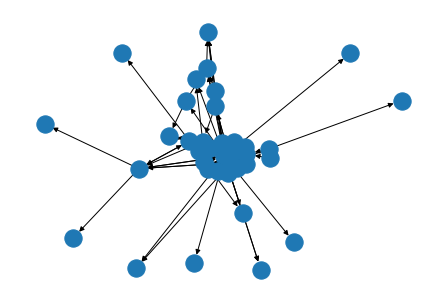

In [21]:
nx.draw(inter_graph)

# Remove non knesset members 

In [22]:
nodes = dict(inter_graph.nodes())
for node in nodes:
    if (str(node)) not in km_full_names:
        inter_graph.remove_node(node)


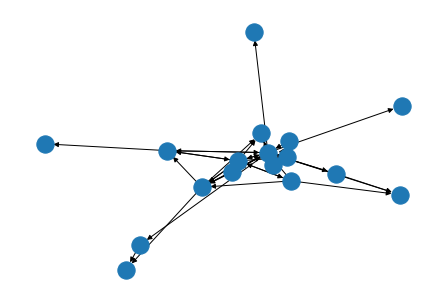

In [23]:
nx.draw(inter_graph)

In [24]:
graphs.extract_adjacency_matrix(inter_graph, 'data/adjacency_matrixes/ksafim_adj.csv')

In [25]:
graphs.extract_features_matrix(inter_graph, 'data/feature_matrixes/ksafim_feat.csv')

# Load all of ועדת החוקה, חוק ומשפט

In [26]:
committees_protocols_folder =  pathlib.Path('data/ועדות לפי נושאים/ועדת החוקה, חוק ומשפט')

In [27]:
transcripts = []
for prot in committees_protocols_folder.glob('*'):
    transcripts.append(commitees.extract_committee_new_transcript(prot))

2020-07-29 11:32:17.762 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:17.845 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:18.163 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:18.257 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:18.446 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:18.510 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:32:18.590 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

In [28]:
transcripts_df = pd.concat(transcripts, ignore_index=True)

In [29]:
transcripts_df

,interaction,speaker_name,speaker_party,subject,text
0,<< יור >>,יעקב אשר,"יו""ר",הצעת חוק לתיקון ולקיום תוקפן של תקנות שעת חיר...,"בוקר טוב, אני מתכבד לפתוח את הישיבה. חברי הווע..."
1,<< יור >>,יעקב אשר,"יו""ר",הצעת חוק לתיקון ולקיום תוקפן של תקנות שעת חיר...,אני רוצה להקדים ולומר: יש דברים שאני מתכוון לע...
2,<< יור >>,יעקב אשר,"יו""ר",הצעת חוק לתיקון ולקיום תוקפן של תקנות שעת חיר...,"מה אני כן חושב שצריך להיות, זה באמת הגברה של י..."
3,<< יור >>,יעקב אשר,"יו""ר",הצעת חוק לתיקון ולקיום תוקפן של תקנות שעת חיר...,"אחרי שאמרתי את הדברים האלה, נפתח את הדיון – קו..."
4,<< דובר >>,קארין אלהרר,"יש עתיד-תל""ם",הצעת חוק לתיקון ולקיום תוקפן של תקנות שעת חיר...,"אדוני, תודה רבה. קודם כל, ההערות שלי מאתמול תק..."
...,...,...,...,...,...
4628,<< יור >>,אוסאמה סעדי,"יו""ר",הצעת חוק חדלות פירעון ושיקום כלכלי (תיקון מס'...,אני מעלה להצבעה את הצעת חוק חדלות פירעון ושיקו...
4629,<< יור >>,אוסאמה סעדי,"יו""ר",הצעת חוק חדלות פירעון ושיקום כלכלי (תיקון מס'...,הצבעה
4630,<< יור >>,אוסאמה סעדי,"יו""ר",הצעת חוק חדלות פירעון ושיקום כלכלי (תיקון מס'...,אושר פה אחד.
4631,<< יור >>,אוסאמה סעדי,"יו""ר",הצעת חוק חדלות פירעון ושיקום כלכלי (תיקון מס'...,אושר פה אחד. ההצעה תועלה היום למליאה להצבעה בק...


# Build interrupt network

In [30]:
inter_graph = graphs.extract_transcript_graph(transcripts_df, g_type='committee_breaking')

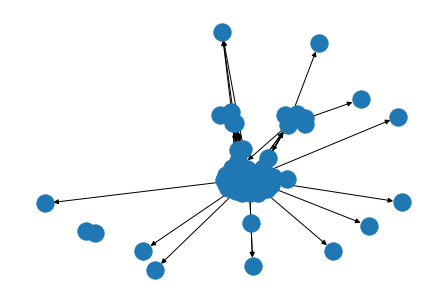

In [31]:
nx.draw(inter_graph)

# Remove non knesset members 

In [32]:
nodes = dict(inter_graph.nodes())
for node in nodes:
    if (str(node)) not in km_full_names:
        inter_graph.remove_node(node)

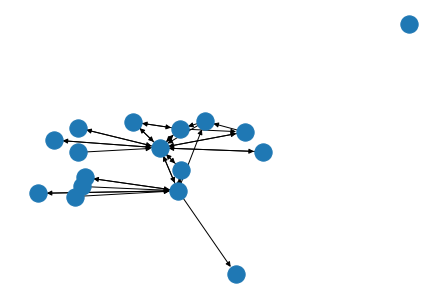

In [33]:
nx.draw(inter_graph)

In [36]:
graphs.extract_adjacency_matrix(inter_graph, 'data/adjacency_matrixes/huka_adj.csv')

In [37]:
graphs.extract_features_matrix(inter_graph, 'data/feature_matrixes/huka_feat.csv')

# Load all of ועדת הכנסת

In [38]:
committees_protocols_folder =  pathlib.Path('data/ועדות לפי נושאים/ועדת הכנסת')

In [39]:
transcripts = []
for prot in committees_protocols_folder.glob('*'):
    transcripts.append(commitees.extract_committee_new_transcript(prot))

2020-07-29 11:33:42.614 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:33:42.661 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:33:42.698 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:33:42.748 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:33:42.763 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:33:42.774 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-07-29 11:33:42.822 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

In [40]:
transcripts_df = pd.concat(transcripts, ignore_index=True)

In [41]:
transcripts_df

,interaction,speaker_name,speaker_party,subject,text
0,<< יור >>,איתן גינזבורג,"יו""ר",הצעת חוק מענק הסתגלות מיוחד לבני 67 ומעלה (הו...,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת הכנסת...."
1,<< יור >>,איתן גינזבורג,"יו""ר",הצעת חוק מענק הסתגלות מיוחד לבני 67 ומעלה (הו...,שני נושאים על סדר היום: בקשת יושב-ראש ועדת העב...
2,<< יור >>,איתן גינזבורג,"יו""ר",הצעת חוק מענק הסתגלות מיוחד לבני 67 ומעלה (הו...,"יושב-ראש ועדת הכספים, הבנתי, הודיע כי הוא מוות..."
3,<< יור >>,איתן גינזבורג,"יו""ר",הצעת חוק מענק הסתגלות מיוחד לבני 67 ומעלה (הו...,"מי בעד להעביר את הצעת החוק לוועדת העבודה, הרוו..."
4,<< יור >>,איתן גינזבורג,"יו""ר",הצעת חוק מענק הסתגלות מיוחד לבני 67 ומעלה (הו...,הצבעה
...,...,...,...,...,...
1412,<< יור >>,איתן גינזבורג,"יו""ר",,מי בעד הרביזיה?
1413,<< יור >>,איתן גינזבורג,"יו""ר",,הצבעה
1414,<< יור >>,איתן גינזבורג,"יו""ר",,הרביזיה לא התקבלה.
1415,<< יור >>,איתן גינזבורג,"יו""ר",,הרביזיה לא התקבלה.


# Build interrupt network

In [42]:
inter_graph = graphs.extract_transcript_graph(transcripts_df, g_type='committee_breaking')

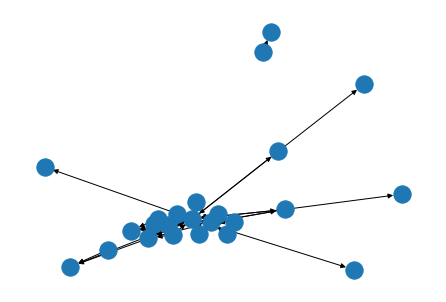

In [43]:
nx.draw(inter_graph)

# Remove non knesset members 

In [44]:
nodes = dict(inter_graph.nodes())
for node in nodes:
    if (str(node)) not in km_full_names:
        inter_graph.remove_node(node)

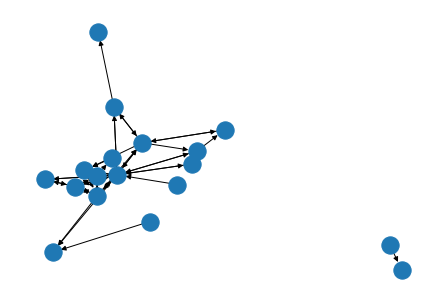

In [45]:
nx.draw(inter_graph)

In [46]:
graphs.extract_adjacency_matrix(inter_graph, 'data/adjacency_matrixes/knesset_adj.csv')

In [47]:
graphs.extract_features_matrix(inter_graph, 'data/feature_matrixes/knesset_feat.csv')